시계열 데이터

1.시간정보가 들어있는 데이터

- "세상에는 시계열 데이터가 참 많다
- 단어가 나타내는 순서가 중요하다
- 샘플의 길이가 다름
2.시계열 데이터를 인식하는 고전적인 모델
- ARIMA, SARIMA
- Prophet 등... 3.시계열 데이터를 인식하는 딥러닝 모델
- 순환 신경망(RNN)
- LSTM(Long short term memory) : 선별기억능력을 갖춰 장기 문맥처리에 유리
매일 기온, 습도, 미세먼지 농도를 기록한다. a1 = (23.2,42,0.25) a2=(, , ,)

- x = (a1,a2,a3 ,,,, at)
- 대표적인 응용은 미래 예측(prediction 또는 forecasting)
1. 내일 주가예측
2. 내일 날씨 예측
3. 기계의 고장 예측
4. 풍속과 풍향 예측(풍력 발전기의 효율 향상)
5. 농산물 가격/수요량 예측
6. 언어번역에 응용
7. 생성모델에 응용(사진을 보고 설명 문장 생성)

##### 비트코인 예측하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
f = open('./data/bitcoin.csv','r')
df = pd.read_csv(f,header=0)

#### Closing Price (USD) 종가만 가져온다

In [4]:
seq = df[['Closing Price (USD)']].to_numpy()

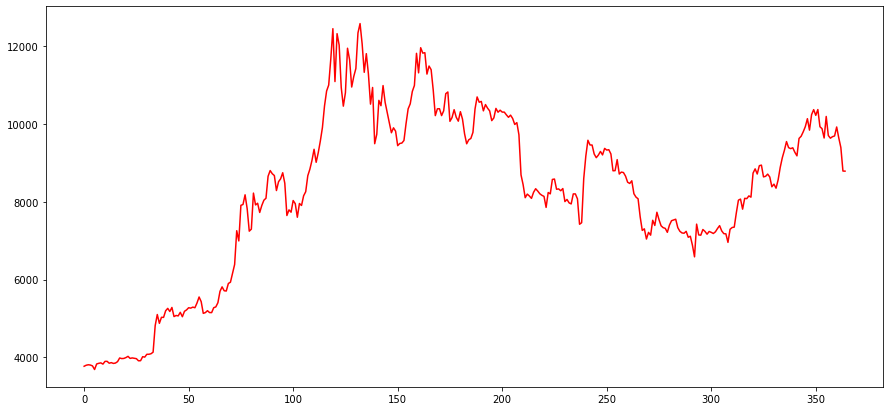

In [5]:
plt.figure(figsize=(15,7))
plt.plot(seq, color = 'red')
plt.show()

In [6]:
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

In [7]:
w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)

In [8]:
# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

In [9]:
x_train[0].shape

(7, 1)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 1s - loss: 944.1687 - mae: 944.1687 - val_loss: 422.2109 - val_mae: 422.2109 - 1s/epoch - 5ms/step
Epoch 2/200
250/250 - 0s - loss: 557.9424 - mae: 557.9424 - val_loss: 380.2403 - val_mae: 380.2403 - 448ms/epoch - 2ms/step
Epoch 3/200
250/250 - 0s - loss: 518.3549 - mae: 518.3549 - val_loss: 318.0057 - val_mae: 318.0057 - 437ms/epoch - 2ms/step
Epoch 4/200
250/250 - 0s - loss: 499.8900 - mae: 499.8900 - val_loss: 377.2368 - val_mae: 377.2368 - 454ms/epoch - 2ms/step
Epoch 5/200
250/250 - 0s - loss: 512.0225 - mae: 512.0225 - val_loss: 529.9921 - val_mae: 529.9921 - 424ms/epoch - 2ms/step
Epoch 6/200
250/250 - 0s - loss: 518.5685 - mae: 518.5685 - val_loss: 525.4409 - val_mae: 525.4409 - 422ms/epoch - 2ms/step
Epoch 7/200
250/250 - 0s - loss: 535.3882 - mae: 535.3882 - val_loss: 298.3967 - val_mae: 298.3967 - 436ms/epoch - 2ms/step
Epoch 8/200
250/250 - 0s - loss: 482.3903 - mae: 482.3903 - val_loss: 281.5877 - val_mae: 281.5877 - 421ms/epoch - 2ms/step
Epoch 9/200

Epoch 67/200
250/250 - 0s - loss: 269.7136 - mae: 269.7136 - val_loss: 174.0607 - val_mae: 174.0607 - 420ms/epoch - 2ms/step
Epoch 68/200
250/250 - 0s - loss: 249.3580 - mae: 249.3580 - val_loss: 181.9838 - val_mae: 181.9838 - 422ms/epoch - 2ms/step
Epoch 69/200
250/250 - 0s - loss: 268.1440 - mae: 268.1440 - val_loss: 167.8620 - val_mae: 167.8620 - 429ms/epoch - 2ms/step
Epoch 70/200
250/250 - 0s - loss: 293.4697 - mae: 293.4697 - val_loss: 171.1704 - val_mae: 171.1704 - 422ms/epoch - 2ms/step
Epoch 71/200
250/250 - 0s - loss: 264.4412 - mae: 264.4412 - val_loss: 308.5727 - val_mae: 308.5727 - 417ms/epoch - 2ms/step
Epoch 72/200
250/250 - 0s - loss: 276.0643 - mae: 276.0643 - val_loss: 243.2836 - val_mae: 243.2836 - 418ms/epoch - 2ms/step
Epoch 73/200
250/250 - 0s - loss: 276.6310 - mae: 276.6310 - val_loss: 281.1349 - val_mae: 281.1349 - 415ms/epoch - 2ms/step
Epoch 74/200
250/250 - 0s - loss: 270.3829 - mae: 270.3829 - val_loss: 182.9230 - val_mae: 182.9230 - 406ms/epoch - 2ms/step


Epoch 133/200
250/250 - 0s - loss: 267.6937 - mae: 267.6937 - val_loss: 289.9479 - val_mae: 289.9479 - 423ms/epoch - 2ms/step
Epoch 134/200
250/250 - 0s - loss: 271.3280 - mae: 271.3280 - val_loss: 195.3766 - val_mae: 195.3766 - 428ms/epoch - 2ms/step
Epoch 135/200
250/250 - 0s - loss: 266.9540 - mae: 266.9540 - val_loss: 165.7025 - val_mae: 165.7025 - 425ms/epoch - 2ms/step
Epoch 136/200
250/250 - 0s - loss: 275.5128 - mae: 275.5128 - val_loss: 191.6212 - val_mae: 191.6212 - 413ms/epoch - 2ms/step
Epoch 137/200
250/250 - 0s - loss: 264.9158 - mae: 264.9158 - val_loss: 194.5511 - val_mae: 194.5511 - 424ms/epoch - 2ms/step
Epoch 138/200
250/250 - 0s - loss: 268.1243 - mae: 268.1243 - val_loss: 197.8745 - val_mae: 197.8745 - 438ms/epoch - 2ms/step
Epoch 139/200
250/250 - 0s - loss: 262.7174 - mae: 262.7174 - val_loss: 170.5117 - val_mae: 170.5117 - 417ms/epoch - 2ms/step
Epoch 140/200
250/250 - 0s - loss: 266.0786 - mae: 266.0786 - val_loss: 167.1528 - val_mae: 167.1528 - 461ms/epoch - 2

250/250 - 0s - loss: 269.6004 - mae: 269.6004 - val_loss: 224.0161 - val_mae: 224.0161 - 409ms/epoch - 2ms/step
Epoch 199/200
250/250 - 0s - loss: 266.8630 - mae: 266.8630 - val_loss: 231.7142 - val_mae: 231.7142 - 430ms/epoch - 2ms/step
Epoch 200/200
250/250 - 0s - loss: 265.5117 - mae: 265.5117 - val_loss: 164.6098 - val_mae: 164.6098 - 406ms/epoch - 2ms/step


In [15]:
# LSTM 모델 평가
ev = model.evaluate(x_test,y_test,verbose = 0)
print(f"손실함수 : {ev[0]}, MAE : {ev[1]}")

손실함수 : 164.60975646972656, MAE : 164.60975646972656


In [17]:
# LSTM모델로 예측 수행
pred =  model.predict(x_test)
print(f"평균절댓값 백분율 오차(MAPE) : {sum(abs(y_test-pred)/y_test)/len(x_test)}")

4/4 [==============================] - 0s 6ms/step
평균절댓값 백분율 오차(MAPE) : [0.01980899]


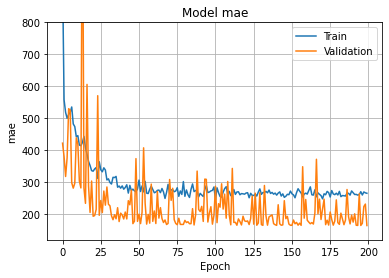

In [18]:
# 학습곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'] )
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

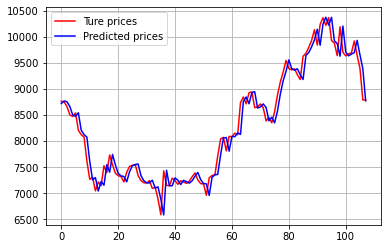

In [19]:
# 예측결과 시각화
x_range = range(len(y_test))
plt.plot(x_range,y_test[x_range],color='red' )
plt.plot(x_range,pred[x_range],color='blue' )
plt.legend(['Ture prices','Predicted prices'], loc = 'best')
plt.grid()
plt.show()

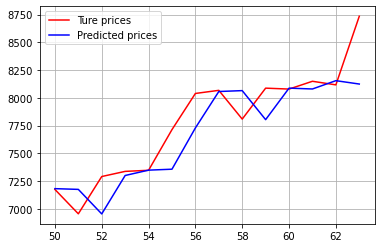

In [20]:
# 일부 구간을 확대하여 시각화
x_range = range(50,64)
plt.plot(x_range,y_test[x_range],color='red' )
plt.plot(x_range,pred[x_range],color='blue' )
plt.legend(['Ture prices','Predicted prices'], loc = 'best')
plt.grid()
plt.show()

In [21]:
# 다중채널 비트코인 가격 예측
seq = df[df.columns[2:]].to_numpy()
seq.shape

(365, 4)

In [22]:
X,Y = seq2dataset(seq,w,h)
print(X.shape, Y.shape)
print(X[0],Y[0])

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]


In [23]:
split = int(len(X)*0.7)
x_train = X[0:split]; y_train = Y[0:split]
x_test = X[split:]; y_test = Y[split:]

In [24]:
# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 1s - loss: 1694.3021 - mae: 1694.3021 - val_loss: 407.2026 - val_mae: 407.2026 - 1s/epoch - 5ms/step
Epoch 2/200
250/250 - 0s - loss: 517.3666 - mae: 517.3666 - val_loss: 355.5747 - val_mae: 355.5747 - 430ms/epoch - 2ms/step
Epoch 3/200
250/250 - 0s - loss: 536.2090 - mae: 536.2090 - val_loss: 662.6036 - val_mae: 662.6036 - 423ms/epoch - 2ms/step
Epoch 4/200
250/250 - 0s - loss: 517.9070 - mae: 517.9070 - val_loss: 364.3149 - val_mae: 364.3149 - 433ms/epoch - 2ms/step
Epoch 5/200
250/250 - 0s - loss: 532.5993 - mae: 532.5993 - val_loss: 371.1299 - val_mae: 371.1299 - 457ms/epoch - 2ms/step
Epoch 6/200
250/250 - 0s - loss: 499.2434 - mae: 499.2434 - val_loss: 324.7910 - val_mae: 324.7910 - 420ms/epoch - 2ms/step
Epoch 7/200
250/250 - 0s - loss: 498.3918 - mae: 498.3918 - val_loss: 382.4432 - val_mae: 382.4432 - 456ms/epoch - 2ms/step
Epoch 8/200
250/250 - 0s - loss: 492.2610 - mae: 492.2610 - val_loss: 338.4027 - val_mae: 338.4027 - 433ms/epoch - 2ms/step
Epoch 9/2

Epoch 67/200
250/250 - 0s - loss: 190.3690 - mae: 190.3690 - val_loss: 143.9515 - val_mae: 143.9515 - 419ms/epoch - 2ms/step
Epoch 68/200
250/250 - 0s - loss: 195.8314 - mae: 195.8314 - val_loss: 132.4705 - val_mae: 132.4705 - 417ms/epoch - 2ms/step
Epoch 69/200
250/250 - 0s - loss: 193.8687 - mae: 193.8687 - val_loss: 168.2059 - val_mae: 168.2059 - 410ms/epoch - 2ms/step
Epoch 70/200
250/250 - 0s - loss: 189.9577 - mae: 189.9577 - val_loss: 157.3155 - val_mae: 157.3155 - 412ms/epoch - 2ms/step
Epoch 71/200
250/250 - 0s - loss: 183.7989 - mae: 183.7989 - val_loss: 154.9316 - val_mae: 154.9316 - 422ms/epoch - 2ms/step
Epoch 72/200
250/250 - 0s - loss: 194.7759 - mae: 194.7759 - val_loss: 131.1151 - val_mae: 131.1151 - 409ms/epoch - 2ms/step
Epoch 73/200
250/250 - 0s - loss: 187.8105 - mae: 187.8105 - val_loss: 128.6459 - val_mae: 128.6459 - 422ms/epoch - 2ms/step
Epoch 74/200
250/250 - 0s - loss: 193.2410 - mae: 193.2410 - val_loss: 146.5610 - val_mae: 146.5610 - 408ms/epoch - 2ms/step


Epoch 133/200
250/250 - 0s - loss: 171.3428 - mae: 171.3428 - val_loss: 128.8891 - val_mae: 128.8891 - 409ms/epoch - 2ms/step
Epoch 134/200
250/250 - 0s - loss: 176.0176 - mae: 176.0176 - val_loss: 119.1277 - val_mae: 119.1277 - 422ms/epoch - 2ms/step
Epoch 135/200
250/250 - 0s - loss: 167.6496 - mae: 167.6496 - val_loss: 164.6106 - val_mae: 164.6106 - 424ms/epoch - 2ms/step
Epoch 136/200
250/250 - 0s - loss: 169.2446 - mae: 169.2446 - val_loss: 126.1729 - val_mae: 126.1729 - 407ms/epoch - 2ms/step
Epoch 137/200
250/250 - 0s - loss: 170.9210 - mae: 170.9210 - val_loss: 141.1888 - val_mae: 141.1888 - 427ms/epoch - 2ms/step
Epoch 138/200
250/250 - 0s - loss: 171.2270 - mae: 171.2270 - val_loss: 110.3385 - val_mae: 110.3385 - 406ms/epoch - 2ms/step
Epoch 139/200
250/250 - 0s - loss: 168.6546 - mae: 168.6546 - val_loss: 118.2792 - val_mae: 118.2792 - 422ms/epoch - 2ms/step
Epoch 140/200
250/250 - 0s - loss: 173.9604 - mae: 173.9604 - val_loss: 158.9955 - val_mae: 158.9955 - 423ms/epoch - 2

250/250 - 0s - loss: 163.9939 - mae: 163.9939 - val_loss: 189.5594 - val_mae: 189.5594 - 410ms/epoch - 2ms/step
Epoch 199/200
250/250 - 0s - loss: 176.4632 - mae: 176.4632 - val_loss: 133.4857 - val_mae: 133.4857 - 407ms/epoch - 2ms/step
Epoch 200/200
250/250 - 0s - loss: 165.0339 - mae: 165.0339 - val_loss: 114.7870 - val_mae: 114.7870 - 420ms/epoch - 2ms/step


In [25]:
# LSTM 모델 평가
ev = model.evaluate(x_test,y_test,verbose = 0)
print(f"손실함수 : {ev[0]}, MAE : {ev[1]}")

손실함수 : 114.78693389892578, MAE : 114.78693389892578


In [26]:
# LSTM 모델로 예측 수행
pred =  model.predict(x_test)
print(f"평균절댓값 백분율 오차(MAPE) : {sum(abs(y_test-pred)/y_test)/len(x_test)}")

4/4 [==============================] - 0s 6ms/step
평균절댓값 백분율 오차(MAPE) : [0.02019423 0.00439841 0.01399226 0.01727912]


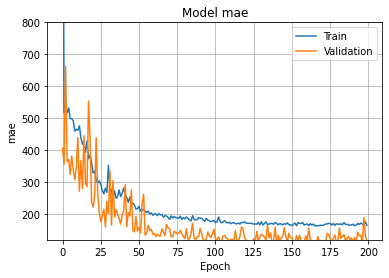

In [27]:
# 학습곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'] )
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()